In [1]:
#print(valid_r_preds[:, 1])
#calculate the predictions of it being real for all, fake is the oppostion
import matplotlib
from matplotlib import pyplot as plt
import collections
#final_guesses[:len(valid_r)]

In [2]:
import numpy as np
import pandas as pd
import os
import time
import pickle

Use the native Bayes Algorithm

In [13]:
def valid_val(key_val, dict_list, p, m, total):
    #m is the total unseen events added
    #p is the prior
    #aka delta smoothing
    try:
        val = dict_list[key_val]  
    except:
        val = 0
    final_val = (val+(m*p))/(total +m)
    return final_val

In [14]:
c = collections.Counter()
def generate_guesses(total_valids, unique_keys, prob_real, prob_fake):
    print(len(total_valids))
    final_guesses = np.zeros(len(total_valids))
    print(final_guesses.shape)
    print("Real Valid DataSet")
    for i, line in enumerate(total_valids):
        #if i == len(valid_r):
        #    print("\nFake Valid Data set\n")
        words = line.split(" ")
        real_preds = np.zeros(len(unique_keys))
        fake_preds   = np.zeros_like(real_preds)
        for j, word in enumerate(unique_keys):
            #if word =="":
            #    continue
            #prob assuming its real
            if word in words:
                real_preds[j] = prob_real[word]
            else:
                real_preds[j] = 1 - prob_real[word]
            #prob assuming its false
            if word in words:
                fake_preds[j] = prob_fake[word]
            else:
                fake_preds[j] = 1 - prob_fake[word]

        #final prob that its real given these words
        vals = np.exp(np.sum(np.log(real_preds), axis = 0)) * p_real
        vals2 = np.exp(np.sum(np.log(fake_preds), axis= 0)) *p_fake
        prob = vals/(vals+vals2)
        #print("P:", prob)
        final_guesses[i] = prob
    return final_guesses
    

In [15]:
#real_news_probs = np.zeros((len(valid_r), ))
#create hashmap of probabilities?
#c = collections.Counter()

def generate_probs(total_train, delta = 0.01, corpus= 10000):
    prob_real = {}
    prob_fake = {}
    for j, line in enumerate(total_train):
        words = line.split(" ")
        #c.update(words)
        vals_bad = np.zeros(len(words))
        vals_good = np.zeros_like(vals_bad)
        for i, word in enumerate(words):
            #the prob of (keywords) given class label
            val = valid_val(word, train_r_counts, delta, corpus, total_real) #train_r_counts[word]
            val2 = valid_val(word, train_b_counts, delta, corpus, total_fake)    
            if word =="":
                continue
            try:
                prob_real[word]
            except:
                prob_real[word] = val
            try:
                prob_fake[word]
            except:
                prob_fake[word] = val2

        #if j %100 ==99:
        #    print("Line:", j)
    unique_real = list(prob_real.keys())
    unique_fake = list(prob_fake.keys())
    unique_real.extend(unique_fake)
    unique_keys = np.unique(unique_real)
    unique_keys.sort()
    print(len(unique_keys))
    return prob_real, prob_fake, unique_keys

In [16]:
train_r = pickle.load(open("train_r.pkl", "rb"))
train_b = pickle.load(open("train_b.pkl", "rb"))
#test = pickle.load(open("test.pkl", "rb"))#print(train)
#valid = pickle.load(open("valid.pkl", "rb"))

In [17]:
#create features, which will be which words show up in each prase?
#create dict  of keys to track how often the word occurs
#c_r = collections.Counter()
train_r_counts = {}
for line in train_r:
    words = line.split(" ")
    c.update(words)
    #print(words)
    #break
    for word in words:
        try:
            train_r_counts[word] +=1
        except:
            train_r_counts[word] =1

train_b_counts = {}
for line in train_b:
    words = line.split(" ")
    c.update(words)
    #print(words)
    #break
    for word in words:
        try:
            train_b_counts[word] +=1
        except:
            train_b_counts[word] =1
print(len(train_r_counts.keys()), len(train_b_counts.keys()))

2957 3019


In [18]:
#train_counts["trump"]
total_real = len(train_r)
total_fake = len(train_b)

total_train = []
total_train.extend(train_r)
total_train.extend(train_b)

#prrob its real or fake
p_real = total_real/(total_real +total_fake)
p_fake = total_fake/(total_fake + total_real)

valid_r = pickle.load(open("valid_r.pkl", "rb"))
valid_b = pickle.load(open("valid_b.pkl", "rb"))
total_valids = []
total_valids.extend(valid_r)
total_valids.extend(valid_b)

4818
490
(490,)
Real Valid DataSet
Accuracy: 0.8673469387755102


/home/naireen/anaconda2/envs/CSC401/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


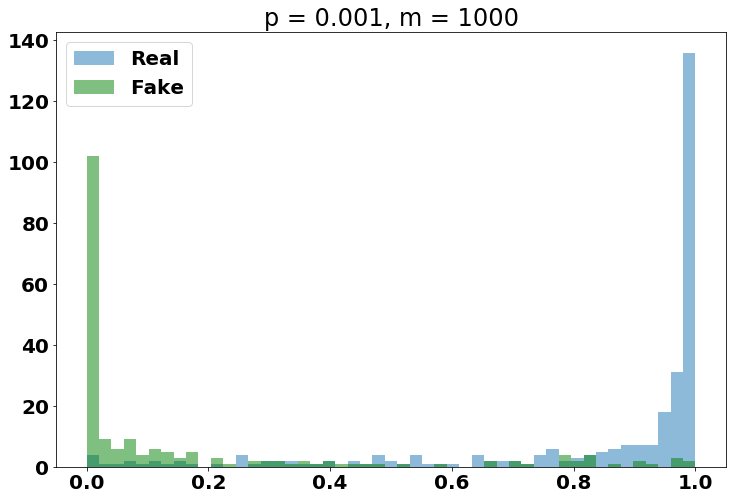

4818
490
(490,)
Real Valid DataSet
Accuracy: 0.8571428571428571


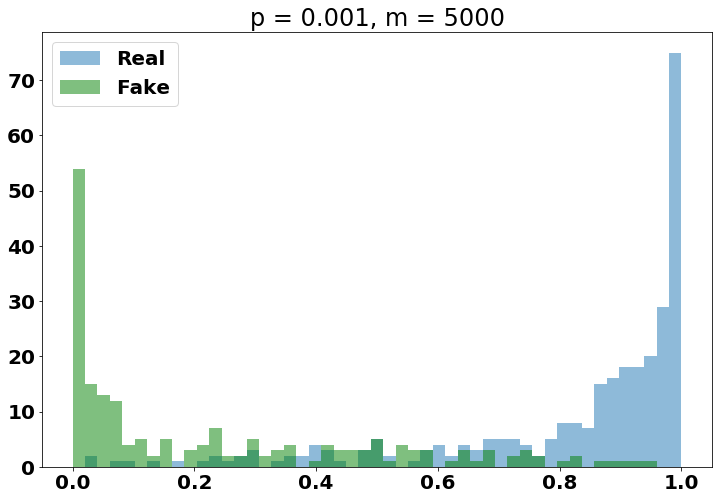

4818
490
(490,)
Real Valid DataSet
Accuracy: 0.8510204081632653


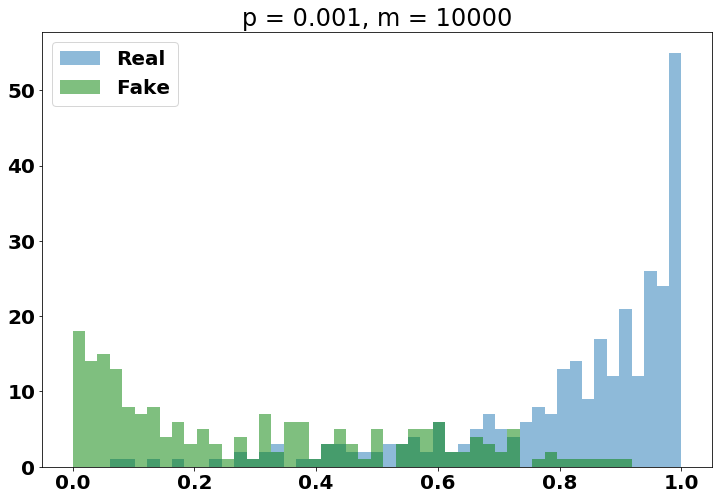

4818
490
(490,)
Real Valid DataSet
Accuracy: 0.7918367346938775


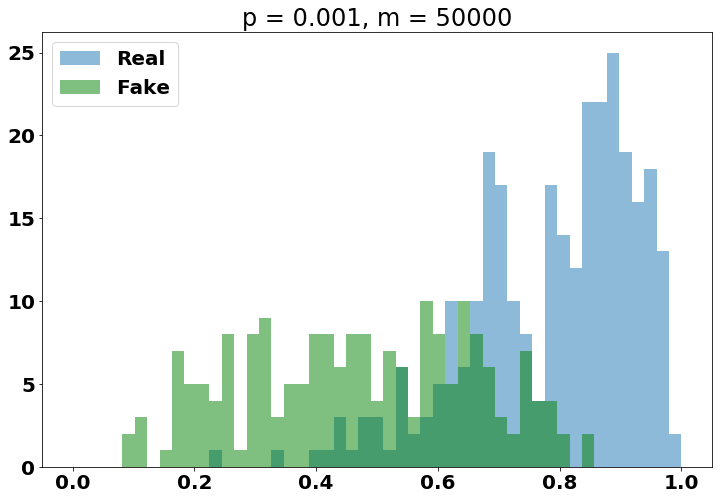

4818
490
(490,)
Real Valid DataSet
Accuracy: 0.736734693877551


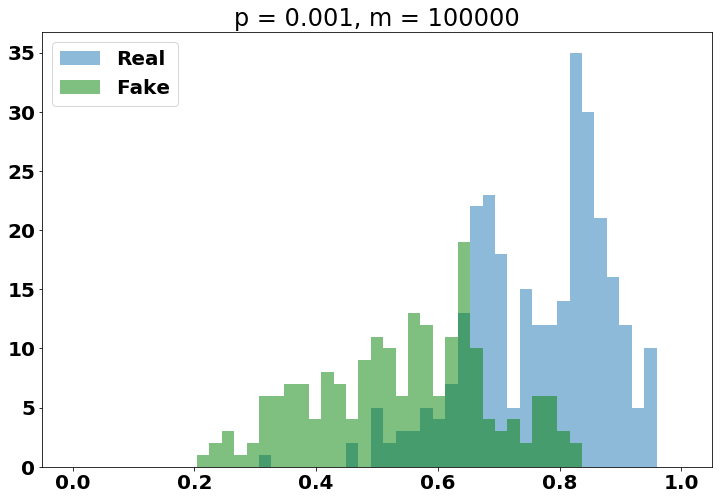

In [19]:
corpuses = [1000,5000,10000,50000,100000]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
#matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **font)

for val in corpuses:
    prob_real, prob_fake, unique_keys = generate_probs(total_train, delta=0.001, corpus=val)
    #now generate probabilities
    #print(len(valid_r))
    final_guesses = generate_guesses(total_valids, unique_keys, prob_real, prob_fake)
    total = len(final_guesses)
    right = final_guesses[:len(valid_r)]
    right = len(right[right>0.5])
    left = final_guesses[len(valid_r):]
    left = len(left[left<0.5])
    print("Accuracy: {0}".format((right+left)/total))
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot('111')
    bins = np.linspace(0, 1, 50)
    ax.hist(final_guesses[:len(valid_r)], bins = bins, label = "Real", alpha = 0.5)
    #plt.show()
    #bins = np.linspace(0.8, 1, 40)
    ax.hist(final_guesses[len(valid_r):], bins = bins, label = "Fake", alpha = 0.5, color = "green")
    plt.legend()
    #plt.title(r"\textbf{ \hat{p}  = 0.001, \text{ } $m$ = }" + str(val),
    #      fontsize=20, color='black')
    plt.title("p = 0.001, m = {0}".format(val))
    plt.show()
    #break

4818
490
(490,)
Real Valid DataSet
Accuracy: 0.8122448979591836


/home/naireen/anaconda2/envs/CSC401/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


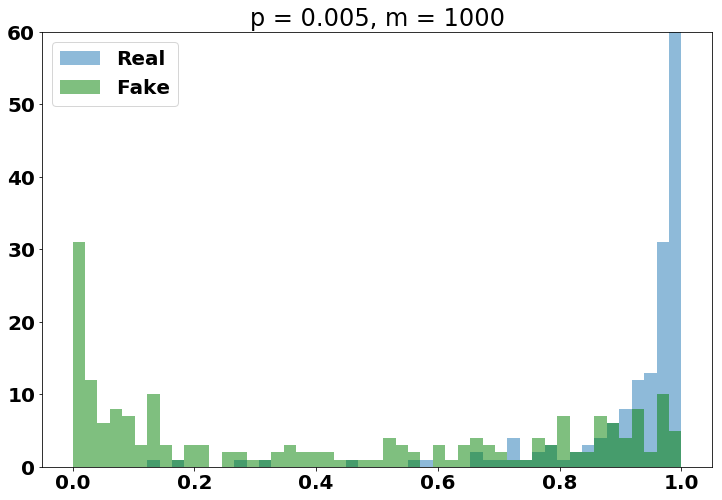

4818
490
(490,)
Real Valid DataSet
Accuracy: 0.8673469387755102


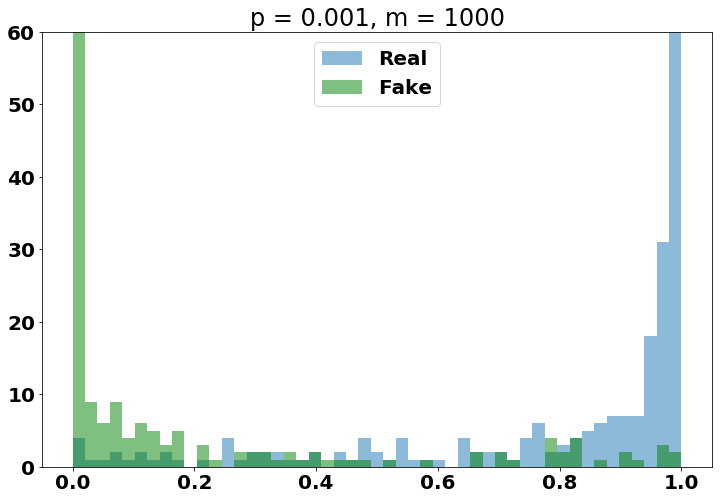

4818
490
(490,)
Real Valid DataSet
Accuracy: 0.8489795918367347


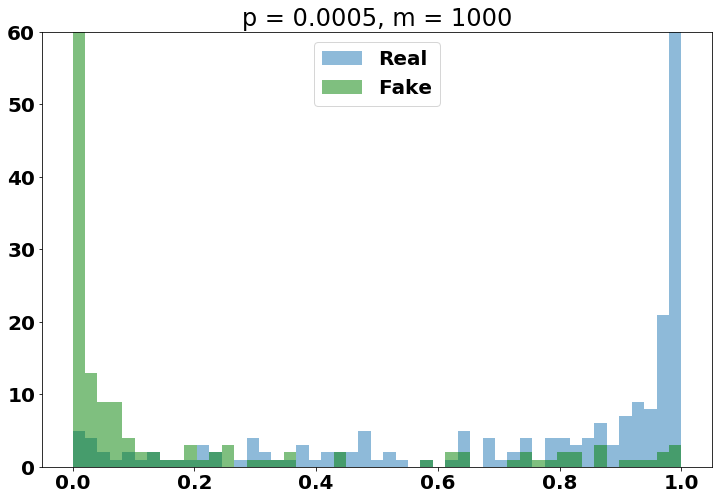

4818
490
(490,)
Real Valid DataSet
Accuracy: 0.8326530612244898


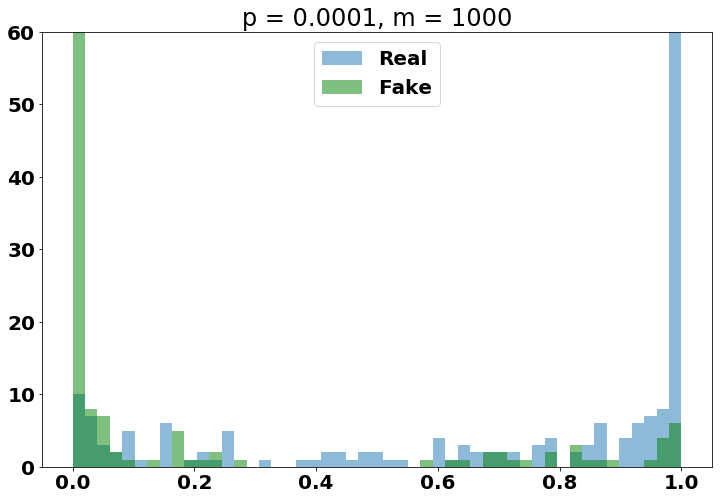

4818
490
(490,)
Real Valid DataSet
Accuracy: 0.8306122448979592


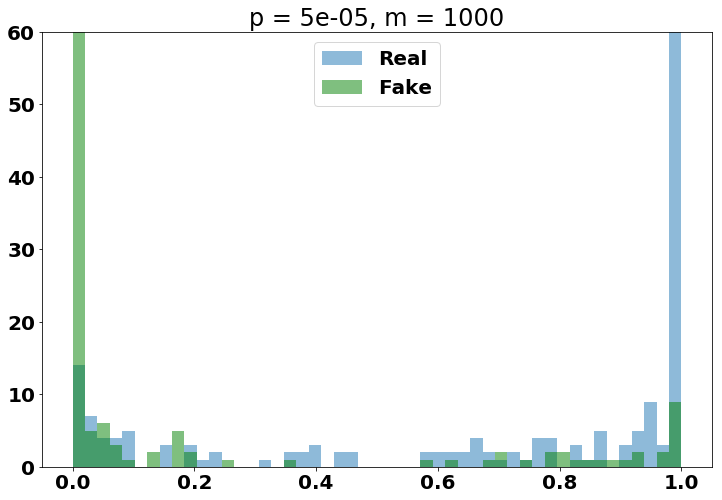

In [20]:
#using the best corpus size, test it with different deltas
#assume that corpus = 10000 was the best
#corpuses = [1000,5000,10000,50000,10000]
delts = [0.005, 0.001, 0.0005, 0.0001, 0.00005]
for d in delts:
    prob_real, prob_fake, unique_keys = generate_probs(total_train, delta=d, corpus=1000)
    #now generate probabilities
    #print(len(valid_r))
    final_guesses = generate_guesses(total_valids, unique_keys, prob_real, prob_fake)
    total = len(final_guesses)
    right = final_guesses[:len(valid_r)]
    right = len(right[right>0.5])
    left = final_guesses[len(valid_r):]
    left = len(left[left<0.5])
    print("Accuracy: {0}".format((right+left)/total))
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot('111')
    bins = np.linspace(0, 1, 50)
    ax.hist(final_guesses[:len(valid_r)], bins = bins, label = "Real", alpha = 0.5)
    #plt.show()
    #bins = np.linspace(0.8, 1, 40)
    ax.hist(final_guesses[len(valid_r):], bins = bins, label = "Fake", alpha = 0.5, color = "green")
    plt.legend()
    plt.ylim([0,60])
    plt.title("p = {0}, m = 1000".format(d))
    plt.show()

In [64]:
#part 3
prob_real, prob_fake, unique_keys = generate_probs(total_train, delta=0.01, corpus=1000)

prob_reals = [prob_real[k] for k in unique_keys]
prob_fakes = [prob_fake[k] for k in unique_keys]

prob_real_vals = np.asarray(prob_reals)
#the indexes
real_here = prob_real_vals.argsort()[-10:][::-1]

prob_fake_vals = np.asarray(prob_fakes)
fake_here = prob_fake_vals.argsort()[-10:][::-1]

print(unique_keys[real_here])
print(unique_keys[fake_here])

4818
['trump' 'donald' 'to' 'us' 'in' 'trumps' 'on' 'of' 'says' 'for']
['trump' 'the' 'to' 'donald' 'in' 'for' 'of' 'a' 'and' 'is']


In [65]:
#for each word in unique keys, compute p for absence of words
#prob that its absence indicates its true
prob_real_vals = np.asarray(prob_reals)
prob_fake_vals = np.asarray(prob_fakes)

#prob of \neg word | class
not_word_real = 1 -prob_real_vals
not_word_fake = 1 - prob_fake_vals

p_real_word={}
total_headlines = len(train_r) + len(train_b)
print(total_headlines)
absense_probs_real = np.zeros(len(unique_keys))
absense_probs_fake = np.zeros(len(unique_keys))


for i, word in enumerate(unique_keys):
    try:
        #print("W", word, "R:", train_r_counts[word])
        val_r = train_r_counts[word]
    except:
        val_r = 0
        pass
    try:
        val_b = train_b_counts[word]
        #print("W", word,"B:", train_b_counts[word])
    except:
        val_b = 0
        pass
    p_not_word = 1. - (val_r+val_b)/float(total_headlines)
    absense_probs_real[i] =  not_word_real[i] *p_real/p_not_word
    absense_probs_fake[i] = not_word_fake[i] *p_fake/p_not_word


2287


In [66]:
#order and take the highest for each
absense_probs_real_ord = np.argsort(absense_probs_real)[-10:][::-1]
absense_probs_fake_ord = np.argsort(absense_probs_fake)[-10:][::-1]

print(unique_keys[absense_probs_real_ord])
print(unique_keys[absense_probs_fake_ord])

['trump' 'the' 'to' 'donald' 'in' 'of' 'for' 'a' 'and' 'on']
['trump' 'donald' 'to' 'trumps' 'us' 'on' 'in' 'of' 'says' 'for']


In [67]:
#load the stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop_words = list(ENGLISH_STOP_WORDS)

In [68]:
prob_real_vals = np.asarray(prob_reals)
prob_real_vals = prob_real_vals.argsort()[-30:][::-1]

prob_fake_vals = np.asarray(prob_fakes)
prob_fake_vals = prob_fake_vals.argsort()[-30:][::-1]

#test a bank of 30, and filter till you're down to to 10
absense_probs_real_ord = np.argsort(absense_probs_real)[-30:][::-1]
absense_probs_fake_ord = np.argsort(absense_probs_fake)[-30:][::-1]

In [71]:
tests= [prob_real_vals, absense_probs_real_ord, prob_fake_vals, absense_probs_fake_ord]
for test in tests:
    #print(test)
    counter = 0
    for word in test:
        #print(word)
        test_word = unique_keys[word]
        #counter = 0
        if test_word in stop_words:
            pass
        else:
            print(test_word, end=" ")
            counter +=1
        if counter == 10:
            break
    print("")

trump donald trumps says election clinton north korea ban russia 
trump donald hillary clinton election obama just new president says 
trump donald hillary clinton election just obama new president america 
trump donald trumps says election korea north ban clinton wall 
